In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join, isdir
from tqdm import tqdm

In [31]:
dfd = pd.read_pickle('/home/icb/manuel.gander/Atl/data/Synched_aucs.pkl')
dfd = dfd.drop_duplicates(['PubChem_CID', 'Dr_repr_name']).copy()
D_dr_rep = dict(zip(dfd['PubChem_CID'], dfd['Dr_repr_name']))

In [32]:
D_s_m = {'GDSC1':'GDSC_v1', 'GDSC2':'GDSC_v2', 'CTD2':'CTRP_v2', 'CTPR':'CTRP_v1', 'MR_NCI60':'NCI_60', 'PRISM2':'PRISM2', 'DTP':'DTP'}

In [33]:
datasets = ['atlantic', 'atl_only_phos', 'atl_only_full', 'Gygi', 'kinase_scores', 'RNA', 'drug_scores', 'atl_full_and_kinases', 'identity']

In [67]:
# 7*7*7 = 294

mypath='/home/icb/manuel.gander/Atl/data/allf'
keys=listdir(mypath)
if '.ipynb_checkpoints' in keys:
    keys.remove('.ipynb_checkpoints')
len(keys)

343

In [68]:
7*7*7

343

In [69]:
frames = []
for k in tqdm(keys):
    df = pd.read_pickle(mypath+'/'+k)
    frames.append(df)
Df = pd.concat(frames, ignore_index=True)
print(Df['source'].iloc[0])
del Df['source']

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 343/343 [00:13<00:00, 24.71it/s]


GDSC2


In [70]:
df = Df.groupby(['PubChem_CID', 'alpha', 'l1_ratio', 'dataset']).mean().reset_index()
df = df[np.isfinite(df['pearsons'])]
df['drug_repr'] = df['PubChem_CID'].map(D_dr_rep)
df['RMSE_ratio'] = df['RMSE']/df['RMSE_mean_model']
df.sort_values('pearsons')

,PubChem_CID,alpha,l1_ratio,dataset,pearsons,spearmans,l1_ratios,RMSE,RMSE_mean_model,td,ind,n_ccls,kn,drug_repr,RMSE_ratio
12525,46907787,0.30,0.50,RNA_nz,-0.708103,-0.613636,1.000064,0.112608,0.112600,0.068843,49.5,62.0,1000000.0,JQ1-(+),1.000069
12145,46843057,0.10,0.99,RNA,-0.689596,-0.525758,1.000614,0.101762,0.101694,0.068063,49.5,61.0,1000000.0,GSK-2110183,1.000669
12148,46843057,0.10,0.99,all,-0.689596,-0.525758,1.000614,0.101762,0.101694,0.140068,49.5,61.0,1000000.0,GSK-2110183,1.000669
12146,46843057,0.10,0.99,RNA_and_full,-0.689596,-0.525758,1.000614,0.101762,0.101694,0.094318,49.5,61.0,1000000.0,GSK-2110183,1.000669
12300,46843057,10.00,0.01,RNA_and_full,-0.689596,-0.525758,1.000092,0.101707,0.101694,0.075906,49.5,61.0,1000000.0,GSK-2110183,1.000130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,11707110,1.00,0.03,RNA_nz,0.760373,0.699511,0.645335,0.129760,0.195346,0.177287,49.5,62.0,1000000.0,trametinib,0.664256
2403,11707110,0.01,0.01,RNA_nz,0.763049,0.704716,0.637691,0.127223,0.195346,0.724370,49.5,62.0,1000000.0,trametinib,0.651269
2550,11707110,0.30,0.01,RNA_nz,0.764599,0.719299,0.646781,0.127843,0.195346,0.665355,49.5,62.0,1000000.0,trametinib,0.654442
2599,11707110,1.00,0.01,RNA_nz,0.772058,0.729489,0.635112,0.126247,0.195346,0.307660,49.5,62.0,1000000.0,trametinib,0.646274


<Axes: xlabel='RMSE_ratio', ylabel='pearsons'>

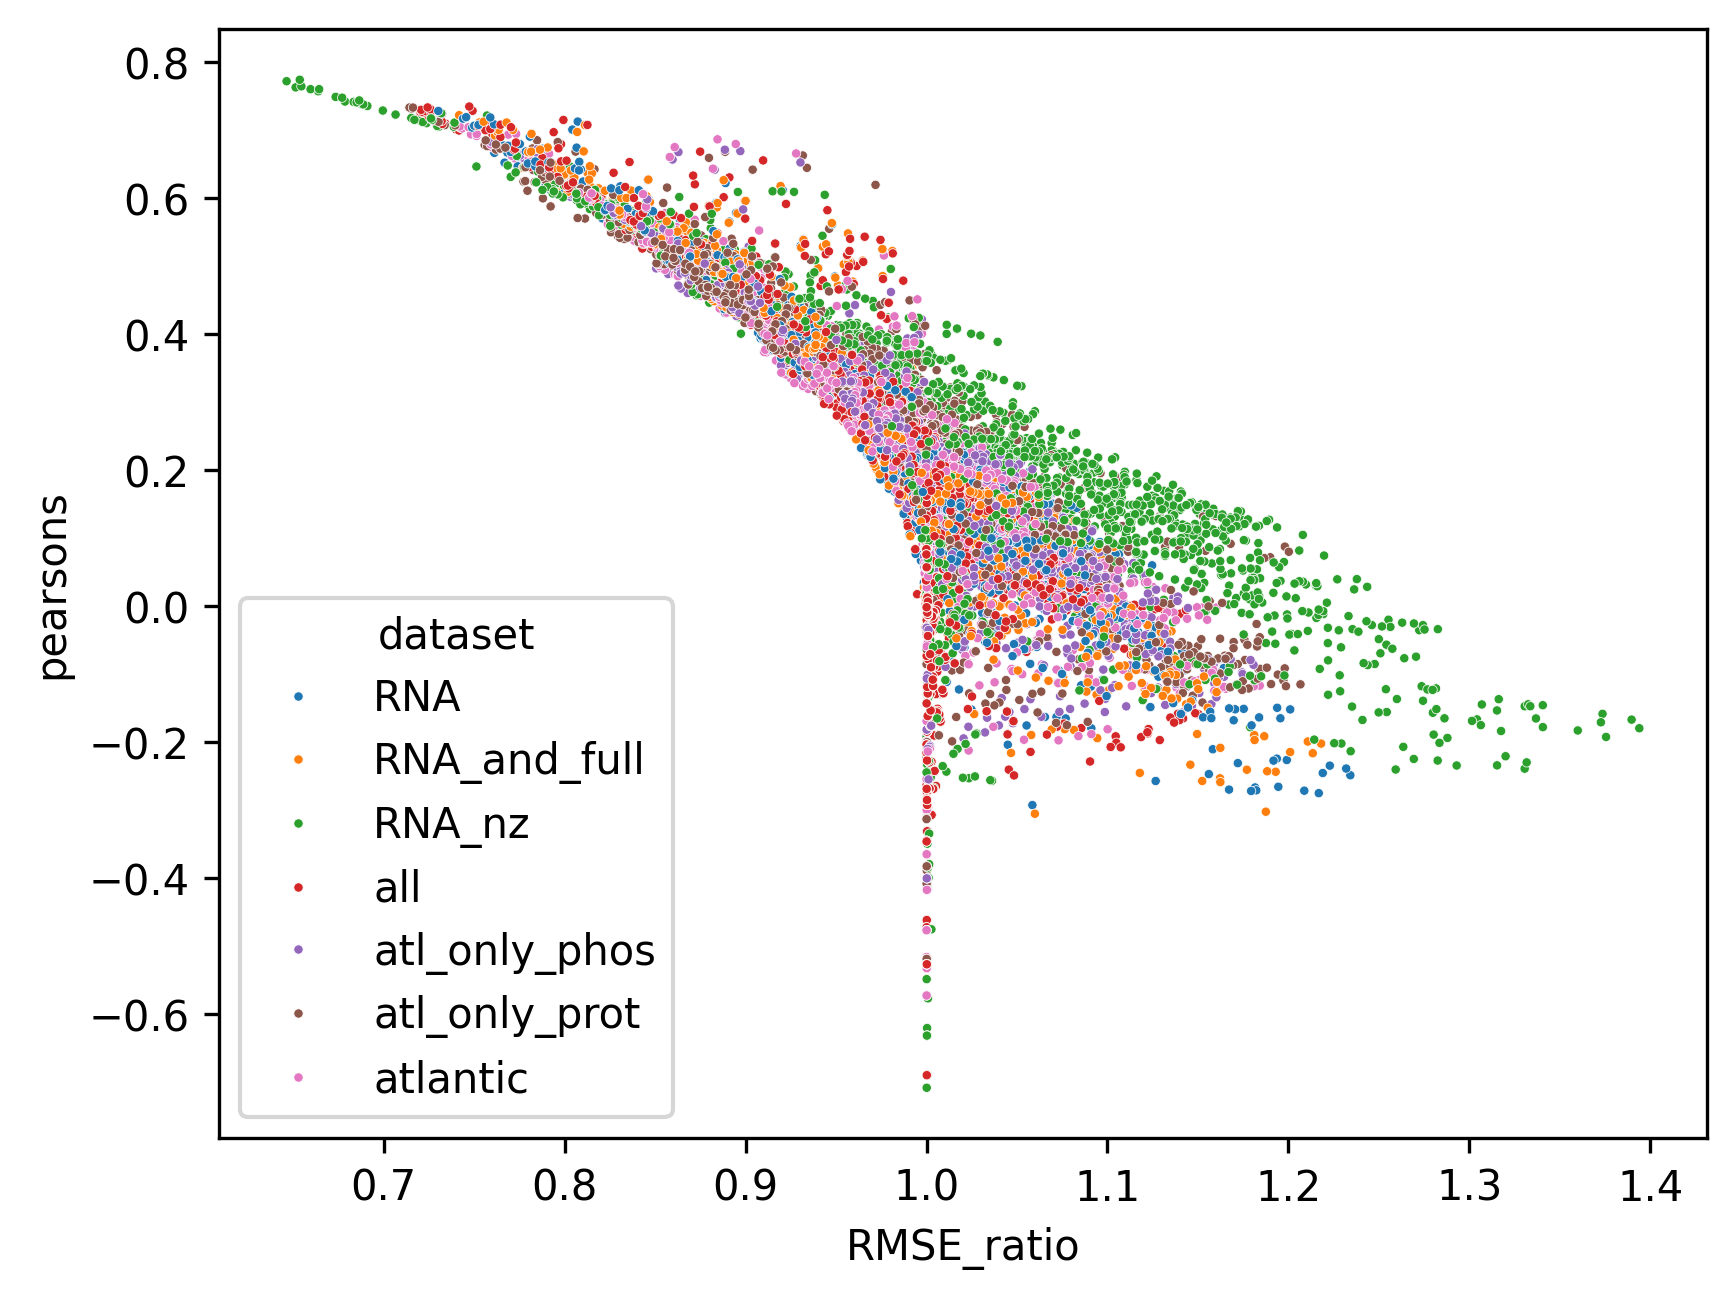

In [71]:
plt.rcParams['figure.dpi'] = 300
sns.scatterplot(data=df, x='RMSE_ratio', y='pearsons', hue='dataset', s=5)

In [72]:
# Pick the one with the best l1_ratio and alpha
crit = 'RMSE_ratio'
crit = 'pearsons'

alphas = sorted(set(df['alpha']))
l1_ratios = sorted(set(df['l1_ratio']))
datasets = sorted(set(df['dataset']))

frames = []
drugs = sorted(set(df['PubChem_CID']))
for dataset in datasets:
    for d in drugs:
        dfss = df[(df['PubChem_CID']==d)&(df['dataset']==dataset)]
        if crit=='RMSE_ratio':
            frames.append(dfss.sort_values(crit).iloc[:1])
        else:
            frames.append(dfss.sort_values(crit).iloc[-1:])
dfm = pd.concat(frames, ignore_index=True)
dfm.sort_values('pearsons')

,PubChem_CID,alpha,l1_ratio,dataset,pearsons,spearmans,l1_ratios,RMSE,RMSE_mean_model,td,ind,n_ccls,kn,drug_repr,RMSE_ratio
358,9936746,0.01,0.01,atl_only_prot,-0.027580,-0.047669,1.189705,0.125844,0.111497,0.462613,49.5,59.0,1000000.0,OTX015,1.128681
336,46907787,0.03,0.99,atl_only_prot,-0.021811,-0.039335,1.006842,0.117188,0.112600,0.029786,49.5,62.0,1000000.0,JQ1-(+),1.040741
396,46907787,0.01,0.01,atlantic,-0.016028,0.006355,1.024776,0.120774,0.112600,0.851038,49.5,62.0,1000000.0,JQ1-(+),1.072589
276,46907787,0.01,0.01,atl_only_phos,-0.009782,0.015771,1.027043,0.120789,0.112600,0.691209,49.5,62.0,1000000.0,JQ1-(+),1.072718
273,446541,0.01,0.01,atl_only_phos,-0.006930,0.030208,1.046307,0.093638,0.087808,0.799820,49.5,55.0,1000000.0,mycophenolic-acid,1.066395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,6253,0.03,0.01,RNA_and_full,0.722106,0.661509,0.681745,0.127938,0.172507,1.134200,49.5,54.0,1000000.0,cytarabine hydrochloride,0.741637
41,6253,0.03,0.01,RNA,0.728338,0.671924,0.664517,0.125953,0.172507,0.786711,49.5,54.0,1000000.0,cytarabine hydrochloride,0.730131
307,11707110,0.10,0.01,atl_only_prot,0.733405,0.709037,0.679660,0.139521,0.195346,0.408411,49.5,62.0,1000000.0,trametinib,0.714222
187,11707110,3.00,0.01,all,0.734844,0.686740,0.704226,0.145974,0.195346,0.474528,49.5,62.0,1000000.0,trametinib,0.747260


In [84]:
D_fn = {'Gygi':'Gygi-CCLE', 'RNA':'RNA (z-scored)', 'atl_full_and_kinases':'Atl. Full+Kinase scores',
        'atl_only_full':'Full', 'atl_only_phos':'Phos', 'RNA_and_full':'RNA+Full',
        'atl_only_prot': 'Full', 'RNA_and_full':'RNA+Full',
        'atlantic': 'Full+Phos', 'all':'RNA+Full+Phos', 'RNA_nz':'RNA non-z-scored'}
dfm['Dataset'] = dfm['dataset'].map(D_fn)

In [85]:
dfm['dataset'].value_counts()

dataset
RNA              60
RNA_and_full     60
RNA_nz           60
all              60
atl_only_phos    60
atl_only_prot    60
atlantic         60
Name: count, dtype: int64

In [86]:
sets = [set(dfm[dfm['dataset']==a]['PubChem_CID']) for a in sorted(set(dfm['dataset']))]
dr_in_all = set.intersection(*sets)

In [87]:
len(dr_in_all)

60

In [88]:
desired_order = ['RNA non-zscored', 'RNA (z-scored)', 'RNA+Full', 'RNA+Full+Phos', 'Full', 'Full+Phos', 'Phos']

dfm['Dataset'] = pd.Categorical(dfm['Dataset'], categories=desired_order, ordered=True)

Text(0, 0.5, 'Pearson Correlation')

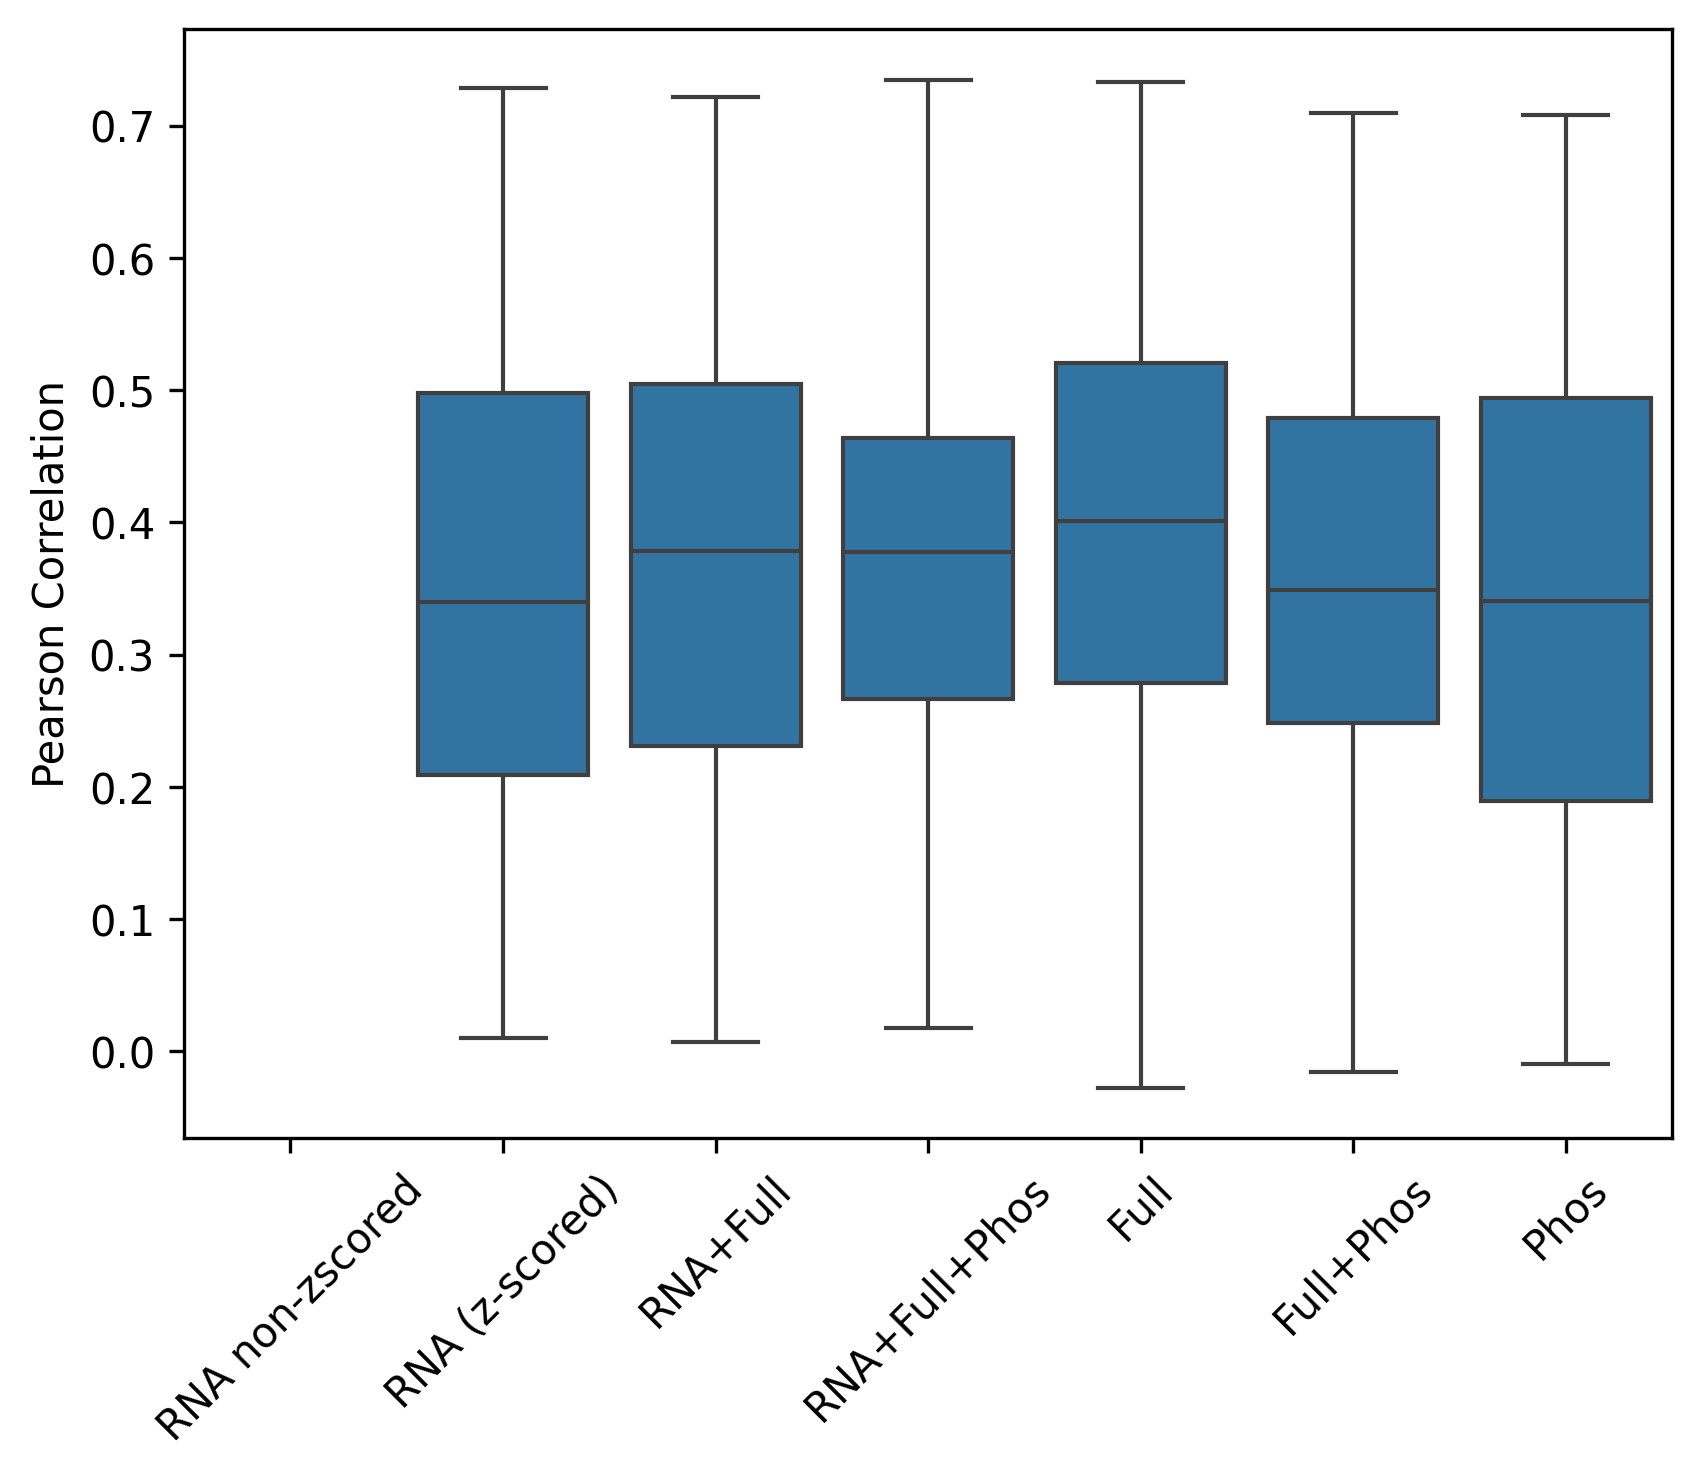

In [89]:
sns.boxplot(data=dfm, x='Dataset', y='pearsons')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Pearson Correlation')

(0.0, 0.6)

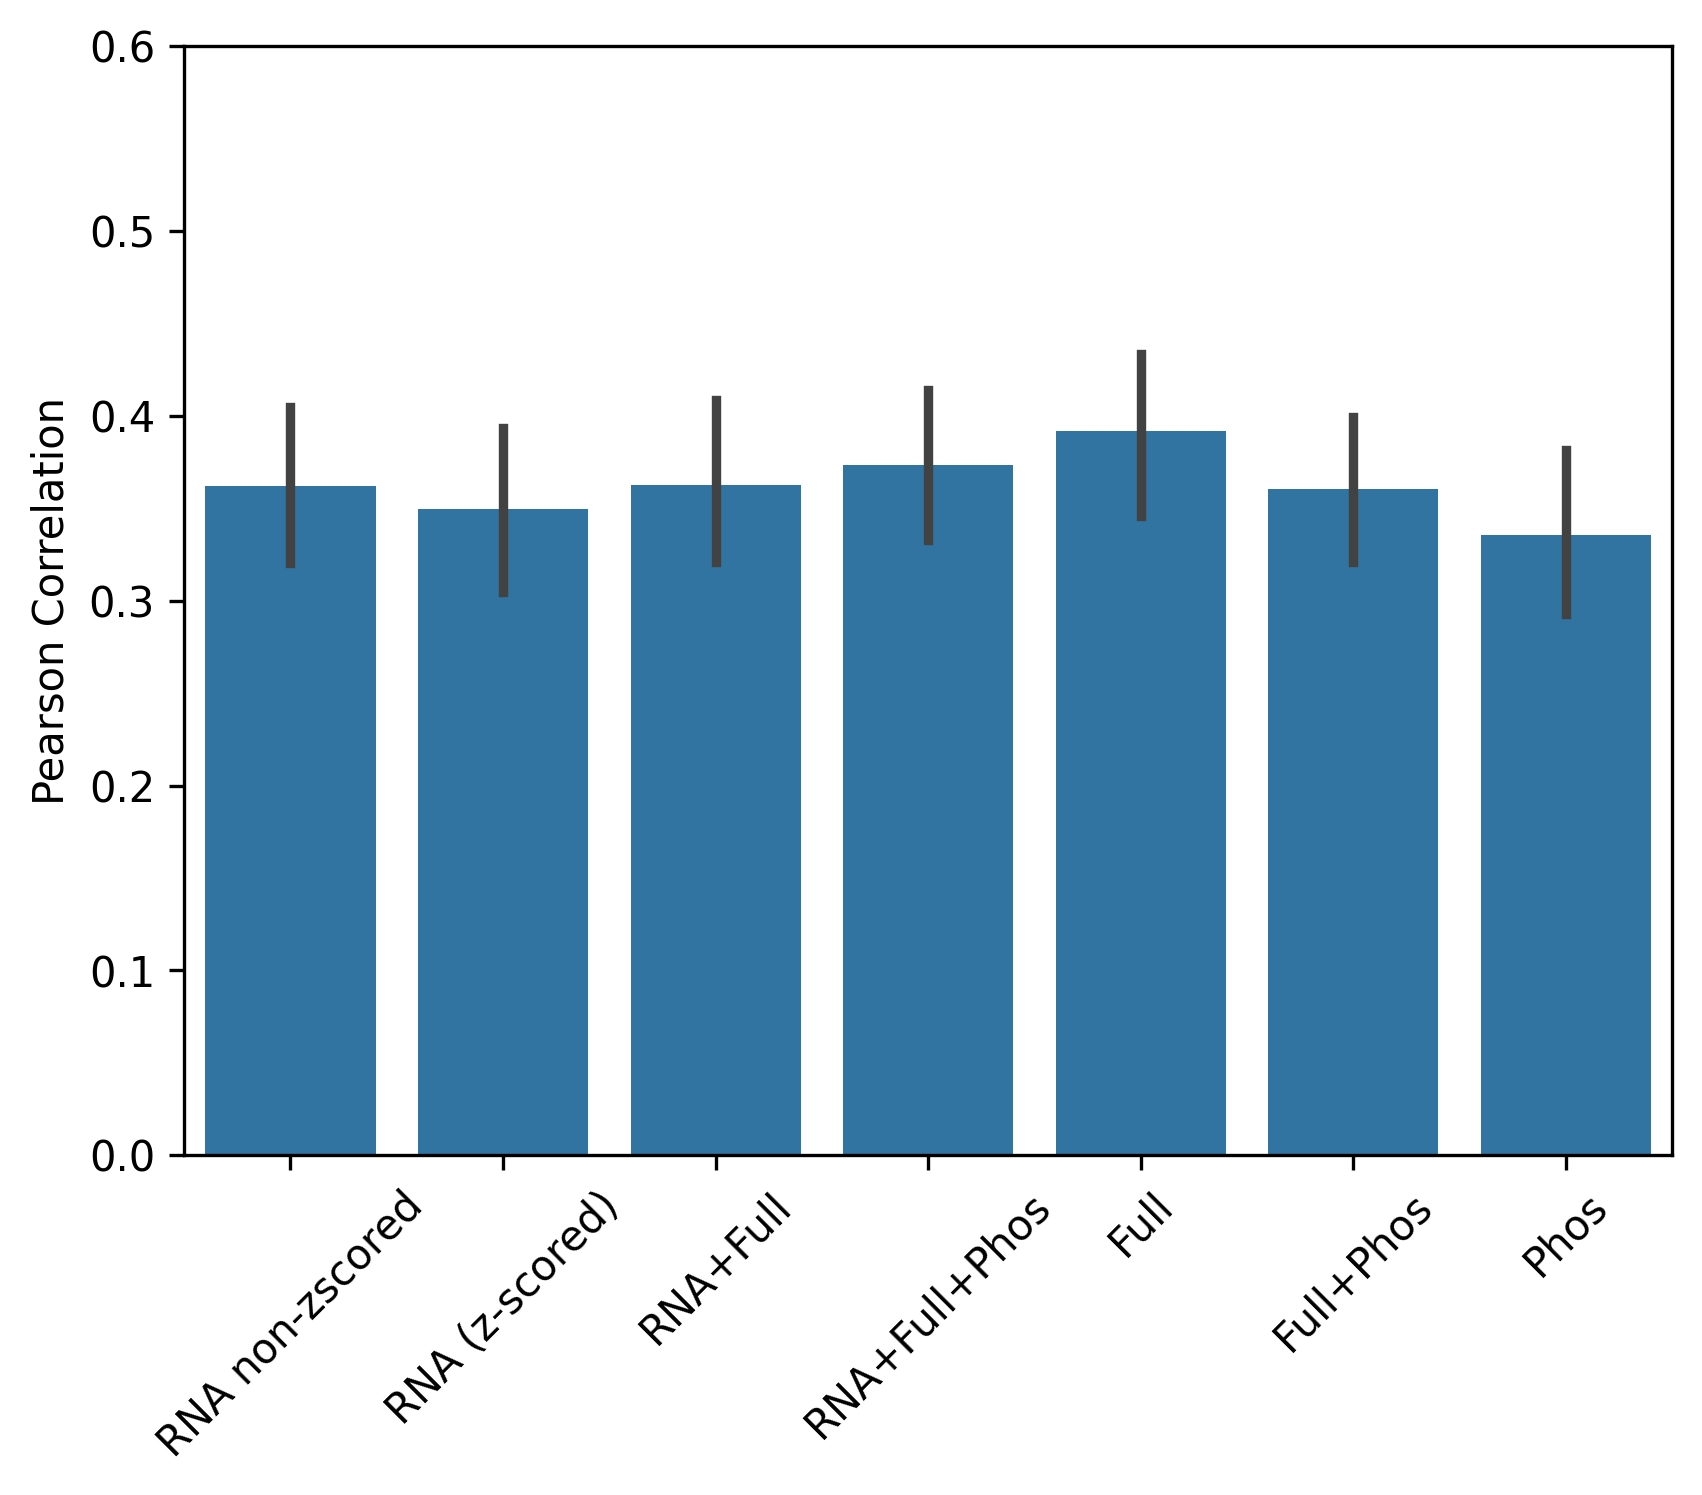

In [82]:
sns.barplot(data=dfm, x='Dataset', y='pearsons')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Pearson Correlation')
plt.ylim(0.0,0.6)

In [80]:
# same 69 cell lines, same 60 drugs

(0.8, 1.0)

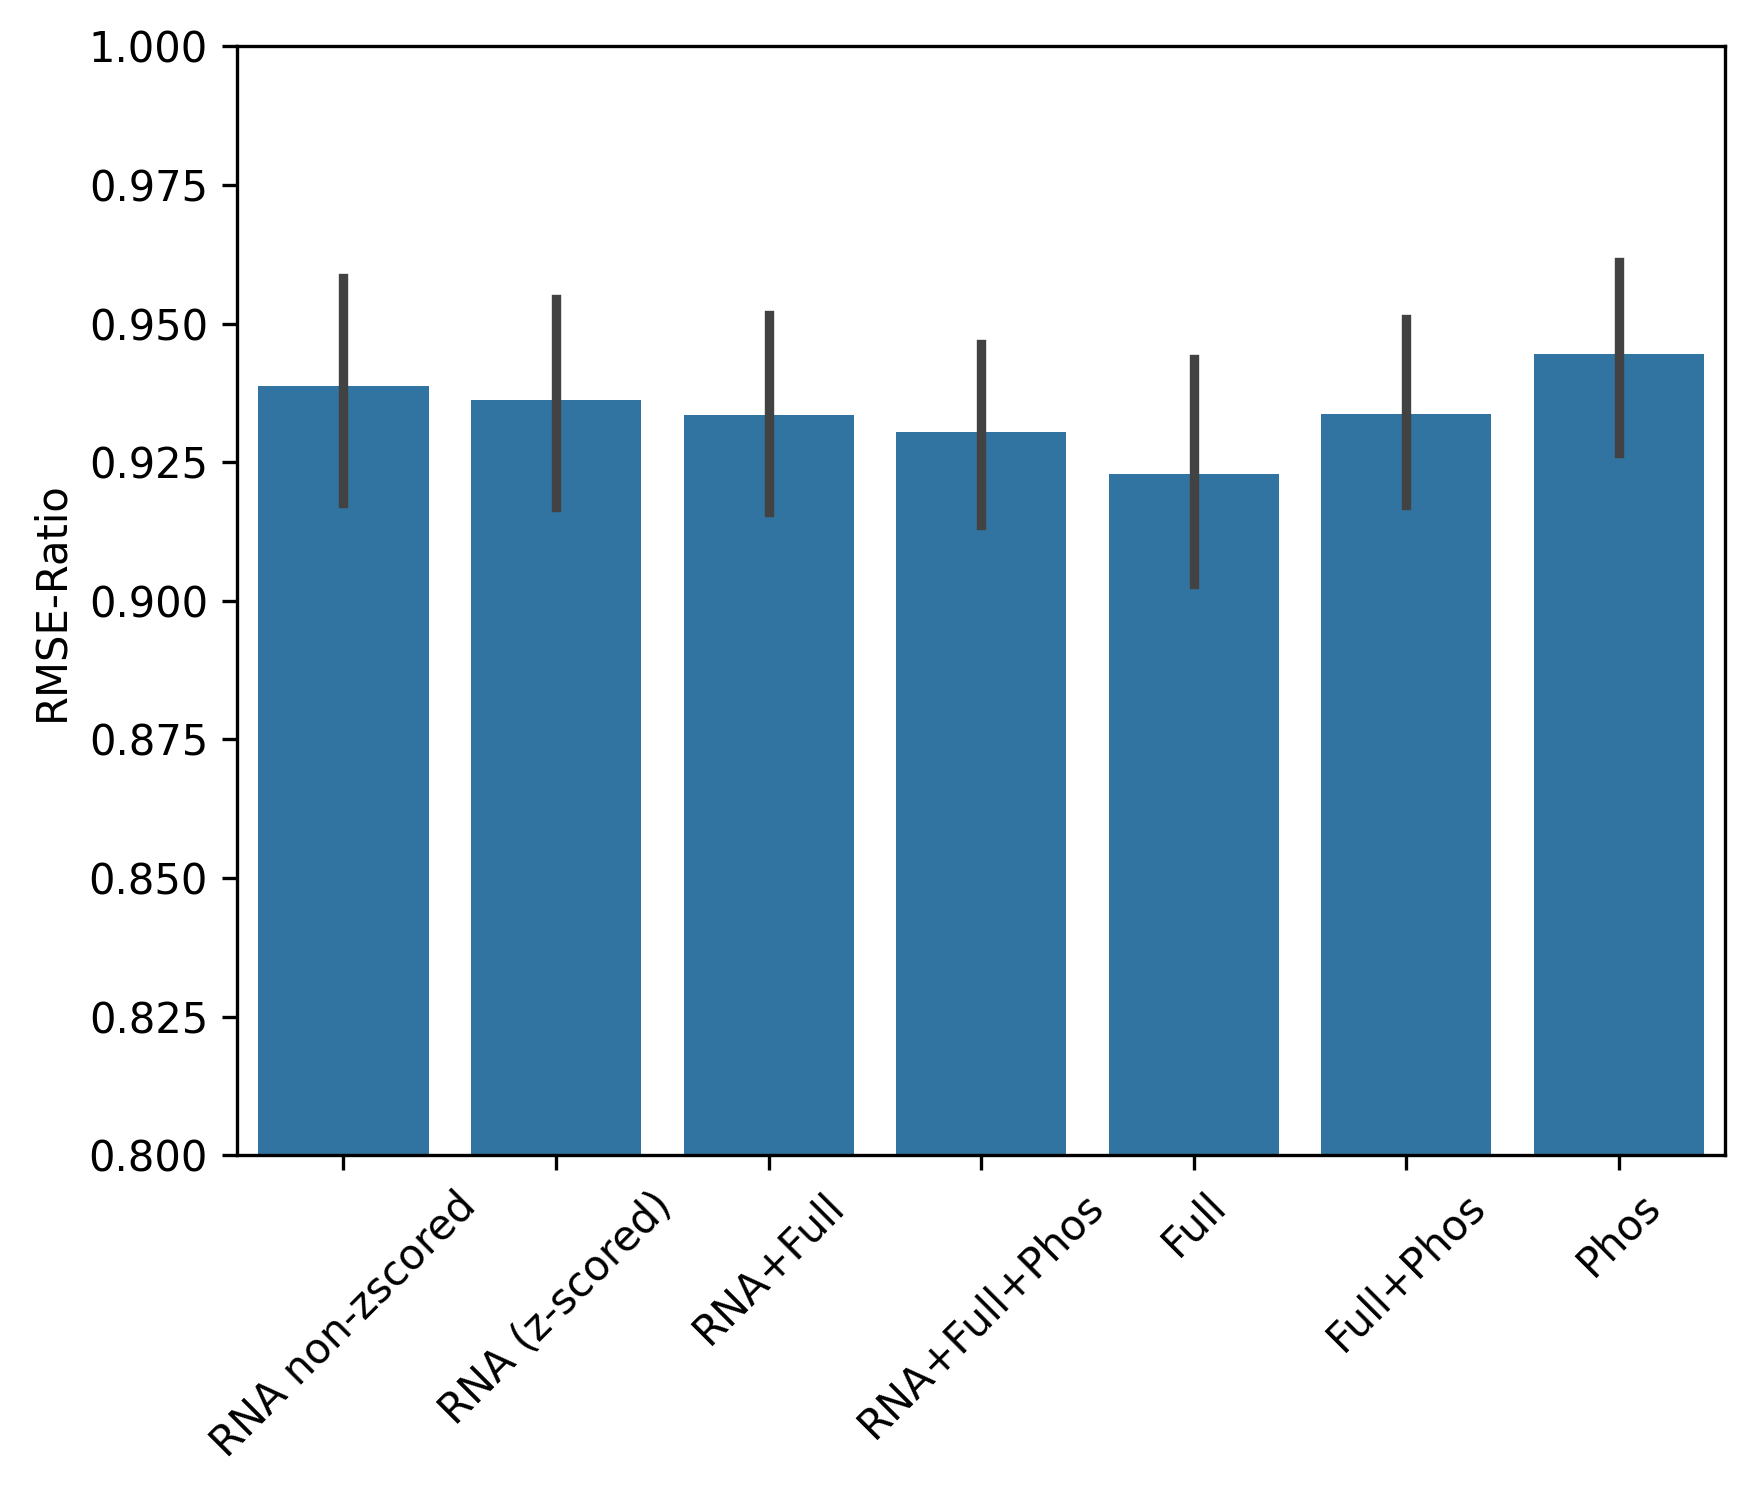

In [83]:
sns.barplot(data=dfm, x='Dataset', y='RMSE_ratio')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('RMSE-Ratio')
plt.ylim(0.8,1)